## AdaDelta算法

也是针对AdaGrad在迭代后期可能较难找到有用解的问题进行优化

### 7.7.1 算法

1. 使用小批量随机梯度$\boldsymbol{g}_{t}$按元素平方的指数加权移动平均变量$\boldsymbol{s}_{t}$,时间步0，它的所有元素被初始化为0
2. 给定超参数$0 \leq \rho < 1$,(对应RMSProp算法中的$\gamma$),在时间步$t$
$$\boldsymbol{s}_{t} \leftarrow \rho \boldsymbol{s}_{t-1} + (1 - \rho) \boldsymbol{g}_{t} \odot \boldsymbol{g}_{t}$$

3. 此时维护一个状态变量$\Delta \boldsymbol{x}_{t}$,在时间步为0初始化0,使用$\Delta \boldsymbol{x}_{t-1}$,$\epsilon$是维持数值稳定性而添加的常数,如$10^{-5}$
$$\boldsymbol{g}'_{t} \leftarrow \sqrt{\frac{\Delta \boldsymbol{x}_{t-1} + \epsilon}{\boldsymbol{s}_{t} + \epsilon}} \odot \boldsymbol{g}_{t}$$

接着更新自变量

$$\boldsymbol{x}_{t} \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}'_{t}$$

最后使用$\Delta \boldsymbol{x}_{t}$记录自变量变化量$\boldsymbol{g}'_{t}$按元素平方的指数加权移动平均

$$\Delta\boldsymbol{x}_{t} \leftarrow \rho \Delta\boldsymbol{x}_{t-1} + (1-\rho) \boldsymbol{g}'_{t} \odot \boldsymbol{g}'_{t}$$

所以AdaDelta算法跟RMSProp算法的不同之处在于使用$\sqrt{\Delta\boldsymbol{x}_{t-1}}$代替学习率

### 7.7.2 从零开始实现

In [1]:
%matplotlib inline
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l

In [10]:
features, labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w, s_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    delta_w, delta_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * (p.grad.data**2)
        g = p.grad.data * torch.sqrt((delta + eps)/(s + eps))
        p.data -= g
        delta[:] = rho * delta + (1 - rho) * g * g


loss: 0.243673, 0.097715 sec per epoch


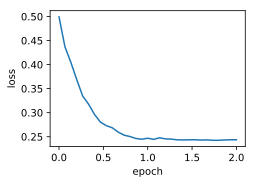

In [11]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

### 7.7.3 简洁实现

loss: 0.250340, 0.078789 sec per epoch


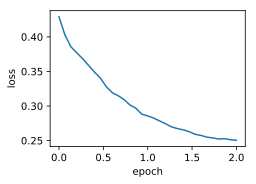

In [12]:
d2l.train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.9}, features, labels)